# Test the hypothesis whether GRE/TOEFL grades play pivotal role in graduate admissions

In [9]:
# for some basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for providing path
import os
print(os.listdir('/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/'))

['BladderC_testdata_bad.txt', '.DS_Store', 'LICENSE', 'BladderC_data.txt', 'Untitled.ipynb', 'Admission_Predict.csv', 'Progress Report 2.pdf', 'classifier_comparison.py', 'Architecture-bladderCancer.doc', 'README.md', 'Progress Report 2.docx', 'Methods_and_Techniques.docx', 'Project_FlowChart.docx', 'BladderCancer.html', 'TestGradesInGraduateAdmission.ipynb', 'Bladder Cancer miRNA marker.pdf', '.ipynb', 'BladderC_testdata.txt', '.ipynb_checkpoints', 'Progress Report 1_Bladder Cancer Detection Team.pdf', '~$thods_and_Techniques.docx', '.git', 'Project_FlowChart.pdf', 'BladderCancerModels_TrainTestSplit.ipynb', 'BladderCancerModels_TrainTest.ipynb', 'BladderC_testdata.txt.zip', 'Unit Test Template.py', 'BladderCancer_Jun3.ipynb']


In [15]:
# reading the data

data = pd.read_csv('/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/Admission_Predict_Ver1.1.csv')
#data2 = pd.read_csv('/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/input/Admission_Predict.csv')

# getting the shapes of the datasets
print("Shape of data1: ", data.shape)
#print("Shape of data2 :", data2.shape)

# combining both the datasets as they have same columns

#data = pd.concat([data, data2])

# getting the shape of new dataset
data.head()

Shape of data1:  (500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# checking if the data contains any NULL values

data.isnull().any().any()

False

In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


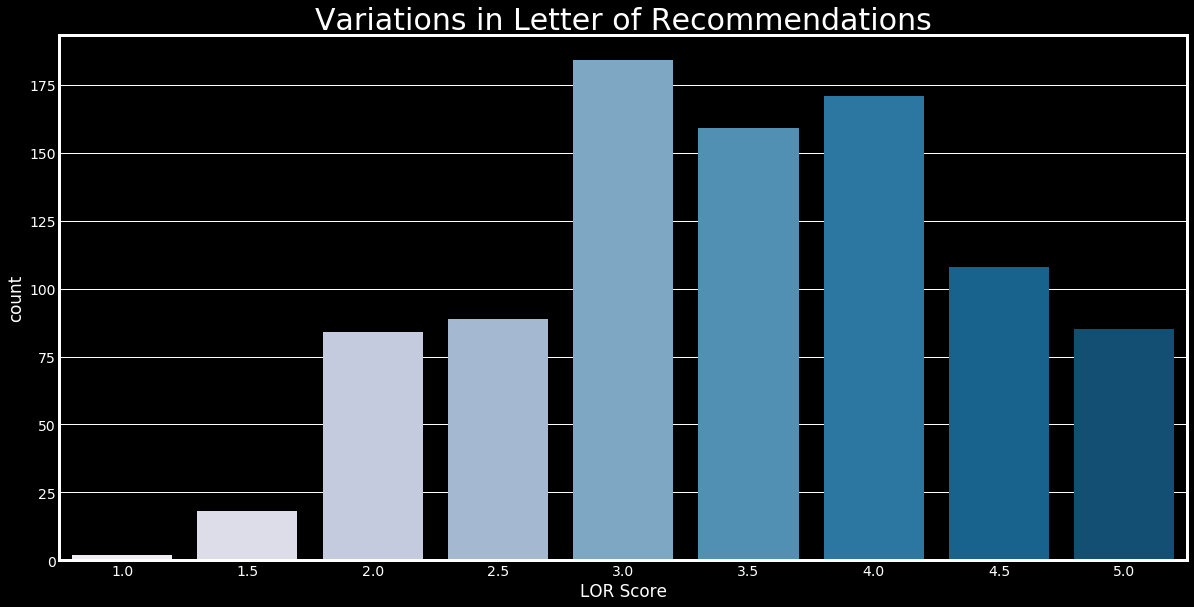

In [8]:
# looking at the variations of LOR among the students

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('dark_background')

sns.countplot(data['LOR '], palette = 'PuBu')
plt.title('Variations in Letter of Recommendations', fontsize = 30)
plt.xlabel('LOR Score')
plt.ylabel('count')
plt.show()

In [16]:
# making a pie chart for the analysis of students rather they did research or not.

data_re = data['Research'].value_counts()

label_re = data_re.index
size_re = data_re.values

colors = ['aqua', 'gold']

trace = go.Pie(
         labels = label_re, values = size_re, marker = dict(colors = colors), name = 'Research', hole = 0.3)

df = [trace]

layout1 = go.Layout(
           title = 'Research work done or not')
fig = go.Figure(data = df, layout = layout1)
py.iplot(fig)

In [17]:
# making a donut chart for the analysis of students with different university ratings

data_ur = data['University Rating'].value_counts()

label_re = data_ur.index
size_re = data_ur.values


trace = go.Pie(
         labels = label_re,
         values = size_re,
         marker = dict(colors = ['gold' 'lightgreen', 'orange', 'yellow', 'pink']),
         name = 'University Ratings',
         hole = 0.2)

df2 = [trace]

layout1 = go.Layout(
           title = 'University Ratings of the Students')
fig = go.Figure(data = df2, layout = layout1)
py.iplot(fig)

In [18]:
trace = go.Box(
            x = data['University Rating'],
            y = data['GRE Score'],
            name = 'University Rating vs GRE Score',
            marker = dict(
                  color = 'rgb(145, 165, 5)')
)
                   

df= [trace]

layout = go.Layout(
    boxmode = 'group',
    title = 'University Ratings vs GRE Score',
    
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

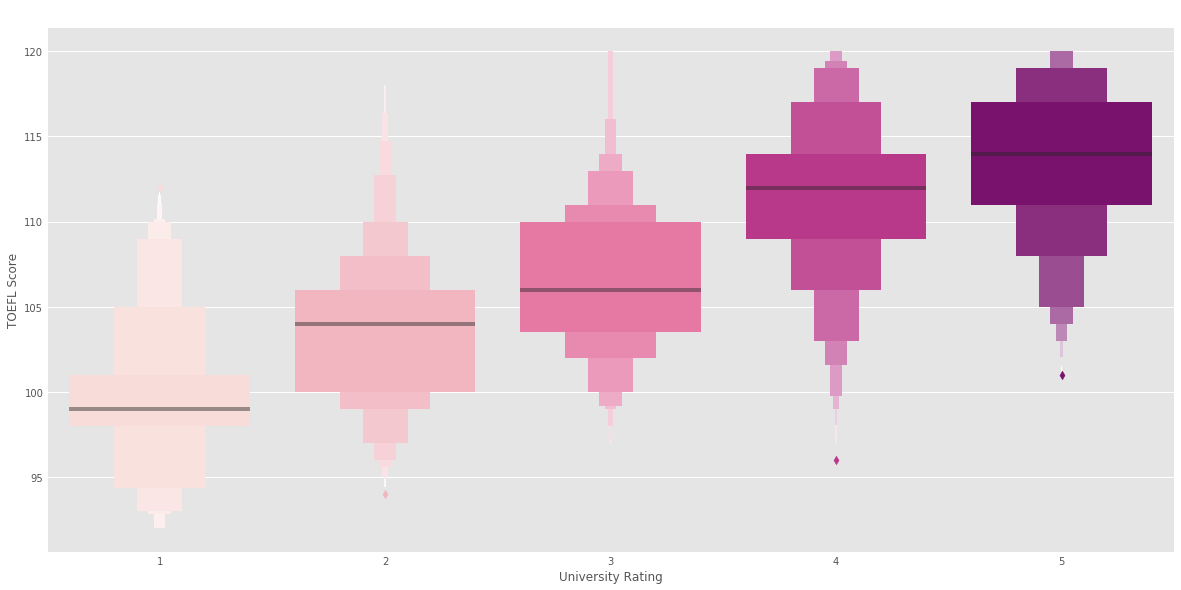

In [12]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.boxenplot(data['University Rating'], data['TOEFL Score'], palette = 'RdPu')
plt.title('University Ratings vs TOEFL Score', fontsize = 20)
plt.show()

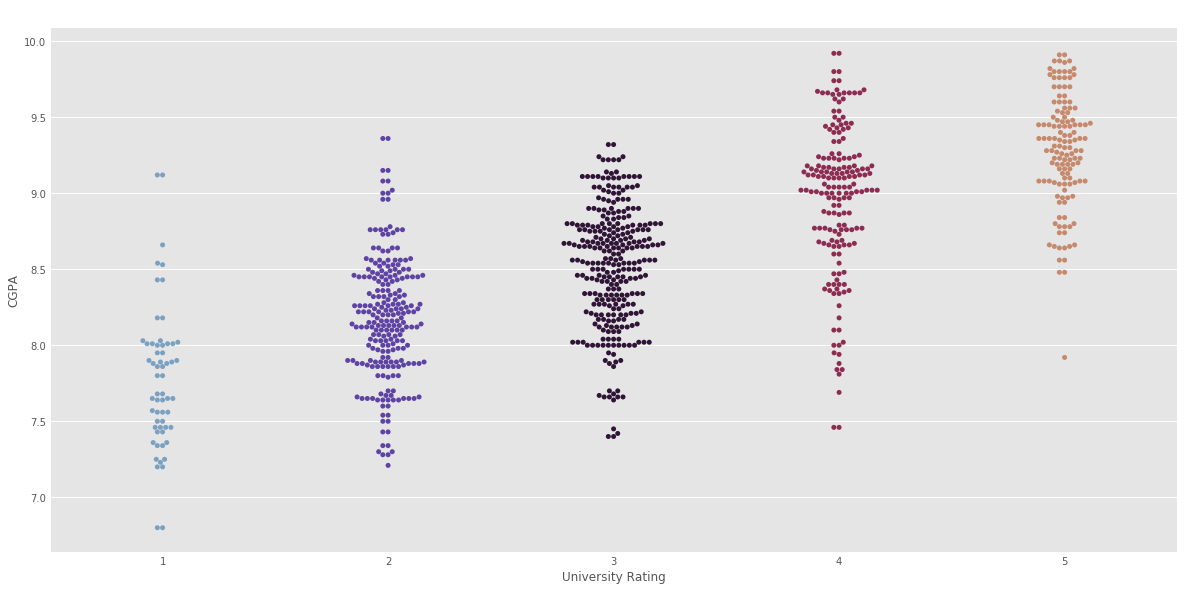

In [13]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.swarmplot(data['University Rating'], data['CGPA'], palette = 'twilight')
plt.title('University Ratings vs CGPA', fontsize = 20)
plt.show()

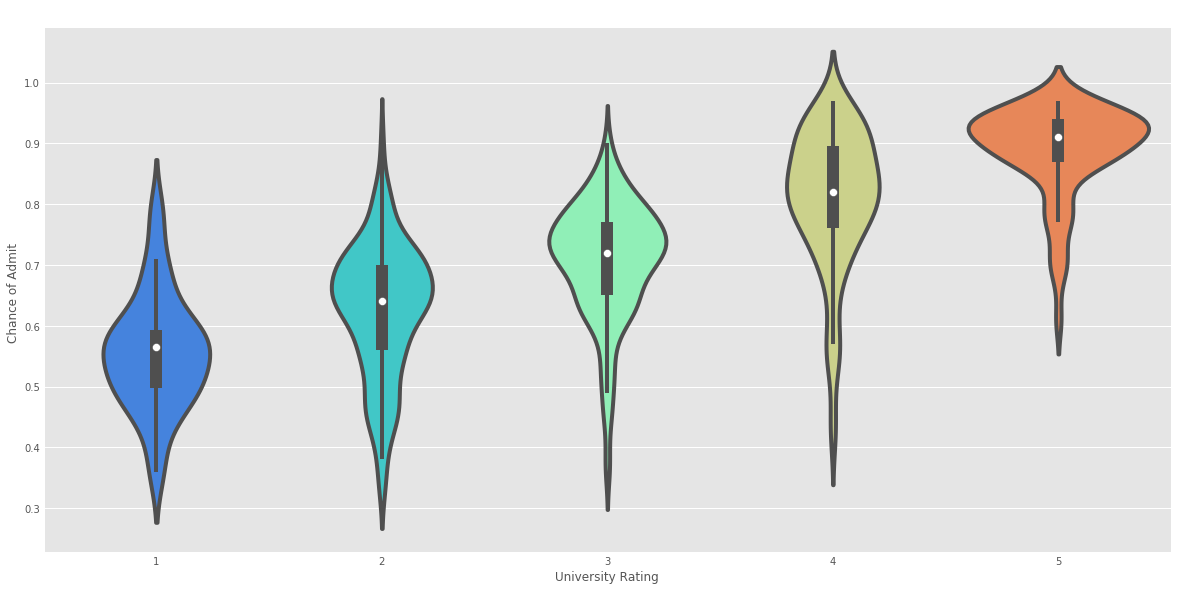

In [14]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.violinplot(data['University Rating'], data['Chance of Admit '], palette = 'rainbow')
plt.title('University Ratings vs Chance of Admission', fontsize = 20)
plt.show()

In [19]:
# prepare data

data2 = data.loc[:,["GRE Score", "TOEFL Score", "Chance of Admit "]]
data2["index"] = np.arange(1,len(data2)+1)

# scatter matrix
fig = ff.create_scatterplotmatrix(data2, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

# Based on the correlation plots above, we concluded that GRE/TOEFL grades do play a pivotal role in graduate admissions